Certaines fonctionnalités de Python ne sont pas chargées dans l'environnement, il faut alors les importer sous forme de modules.

On peut distinguer plusieurs sources de modules:
1. Les modules "built-in" qui sont intégrés à Python ( [la liste est ici](https://docs.python.org/3/py-modindex.html) ) 
2. Les modules qui sont au sein de packages via des librairies présentes sur Pypi, conda ou conda-forge (exemple pandas, matplotlib, Tensorflow), sur github, ou des librairies que l'on a créé soit même.
3. Les modules que l'on a produit soit même au sein de son projet.

Quelle est la différence entre un module, un package et une librairie ?   

- module : Ensemble de ligne de codes stockées dans un fichier `.py`
- package : Ensemble de modules (qui peuvent être contenus dans des sous-packages)
- librairie : Un packages qui contient un ensembre de packages (qui peuvent contenir des sous-packages) ensemble de module et de  ( e.g `matplotlib`)

Réponse plus complète ici : https://learnpython.com/blog/python-modules-packages-libraries-frameworks/

### Import simple 

In [17]:
import math

In [18]:
math.cos(12)

0.8438539587324921

### Importer un objet spécifique d'un module 

In [3]:
from math import cos

In [4]:
cos(12)

0.8438539587324921

### importer avec un alias

In [5]:
import math as m

In [6]:
m.cos(12)

0.8438539587324921

### Importer un objet spécifique d'un module avec un alias

In [7]:
from math import degrees as dg

In [8]:
dg(1)

57.29577951308232

### Importer un sous module d'une librairie

In [19]:
import matplotlib.pyplot #mauvaise manière

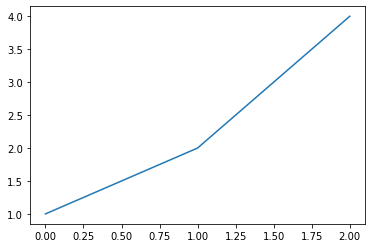

In [20]:
matplotlib.pyplot.plot([1,2,4])

In [21]:
from matplotlib import pyplot

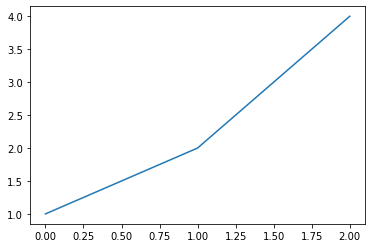

In [22]:
pyplot.plot([1,2,4])

### Importer un sous module d'une librairie avec un alias

In [23]:
import matplotlib.pyplot as plt

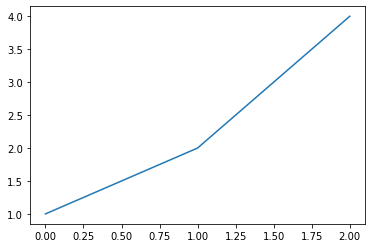

In [24]:
plt.plot([1,2,4])

In [25]:
from matplotlib import pyplot as plt

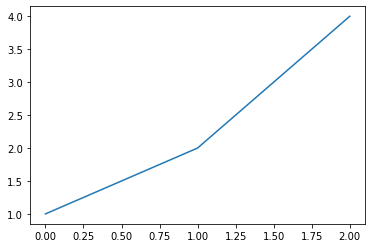

In [26]:
plt.plot([1,2,4])

⚠️ Importer une librairie/un module spécifique va parfois importer des objets (classes, fonctions, variables) car le fichier `__init__.py` contient du code

In [27]:
import pandas as pd

In [28]:
pd.DataFrame([1,2,3])

,0
0,1
1,2
2,3


In [29]:
pd.__path__

['/srv/conda/envs/notebook/lib/python3.7/site-packages/pandas']

In [32]:
file_o=open(pd.__path__[0]+"/__init__.py") 
print(file_o.read())  

# flake8: noqa

__docformat__ = "restructuredtext"

# Let users know if they're missing any of our hard dependencies
hard_dependencies = ("numpy", "pytz", "dateutil")
missing_dependencies = []

for dependency in hard_dependencies:
    try:
        __import__(dependency)
    except ImportError as e:
        missing_dependencies.append(f"{dependency}: {e}")

if missing_dependencies:
    raise ImportError(
        "Unable to import required dependencies:\n" + "\n".join(missing_dependencies)
    )
del hard_dependencies, dependency, missing_dependencies

# numpy compat
from pandas.compat import (
    np_version_under1p18 as _np_version_under1p18,
    is_numpy_dev as _is_numpy_dev,
)

try:
    from pandas._libs import hashtable as _hashtable, lib as _lib, tslib as _tslib
except ImportError as e:  # pragma: no cover
    # hack but overkill to use re
    module = str(e).replace("cannot import name ", "")
    raise ImportError(
        f"C extension: {module} not built. If you want to import "


La logique de ce qui est importé ou pas sur des librairies matures fait l'object de réflextions sur le design de l'API d'une librairie.  
Par exemple pour ceux intéressé par les réflexions qui on été faites autour de l'API de `scikit-learn` :  https://arxiv.org/abs/1309.0238